In [1]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4
!pip install textblob

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.1/12.8 MB 4.0 MB/s eta 0:00:04
     - -------------------------------------- 0.3/12.8 MB 4.1 MB/s eta 0:00:04
     - -------------------------------------- 0.5/12.8 MB 4.3 MB/s eta 0:00:03
     -- ------------------------------------- 0.8/12.8 MB 4.5 MB/s eta 0:00:03
     --- ------------------------------------ 1.0/12.8 MB 4.6 MB/s eta 0:00:03
     --- ------------------------------------ 1.2/12.8 MB 4.7 MB/s eta 0:00:03
     ---- ----------------------------------- 1.5/12.8 MB 4.7 MB/s eta 0:00:03
     ----- ---------------------------------- 1.7/12.8 MB 4.7 MB/s eta 0:00:03
     ------ --------------------------------- 2.0/12.8 MB 4.8 MB/s eta 0:00:03
     ------ --------------------------------- 2.2/12.8 MB 4.8

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/twitter_sentiment.csv', header=None, index_col=[0])
df

,1,2,3
0,,,
2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2401,Borderlands,Positive,im coming on borderlands and i will murder you...
2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...
4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...


In [4]:
df = df[[2,3]].reset_index(drop=True)

In [5]:
df.columns = ['sentiment', 'text']

In [6]:
df.head()

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75682 non-null  object
 1   text       74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [8]:
df.isnull().sum()
df.dropna(inplace=True)
#df = df[df['text'].apply(len)]

In [9]:
print(df.shape)
df['text'].apply(len).value_counts()
print(df.shape)

(74996, 2)
(74996, 2)


In [10]:
sum(df['text'].apply(len)>5)

72883

In [11]:
df.sample(10)

,sentiment,text
51217,Negative,FIFA updates: Former FIFA finance director ban...
55748,Negative,C4 st.store.playstation.com /
35297,Negative,you can easy plz check status of awb 392610366...
6947,Negative,Aye Amazon and running shit lmfao bullying con...
29696,Negative,I am no longer going to spend money on
71193,Neutral,@GhostRecon loving Wildlands is my daily chall...
69241,Positive,Do not lie this game looks good... definitely ...
57607,Neutral,Talk about perfect timing!. @ Professor _ legi...
50649,Negative,Sad Battlefield fan also sad :(
26812,Positive,5 So bad ass. The Hype is still real in my hea...


In [12]:
df['sentiment'].value_counts()


sentiment
Negative      22624
Positive      20932
Neutral       18393
Irrelevant    13047
Name: count, dtype: int64

In [13]:
#Preprocessing preprocess_kgptalkie

In [14]:
import preprocess_kgptalkie as ps

df.head()

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [15]:
df.columns

Index(['sentiment', 'text'], dtype='object')

In [16]:
 df.head()

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [17]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# plot 2x4 grid histogram for each numerical feature
plt.figure(figsize=(20,10))

num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    plt.subplot(2,4, num_cols.get_loc(col)+1)

    # use sentiment as hue to see the distribution of each numerical feature
    # sns.distplot(df[col], label=col, color='red')
    # sns.histplot(x=col, hue='sentiment', data=df, color='green', bins=100, kde=True)
    sns.kdeplot(data=df, x=col, hue='sentiment', fill=True)

<Figure size 2000x1000 with 0 Axes>

<Axes: ylabel='count'>

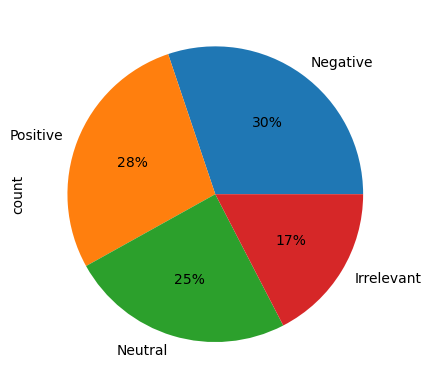

In [18]:
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')

In [19]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [20]:

# word cloud
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

In [21]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

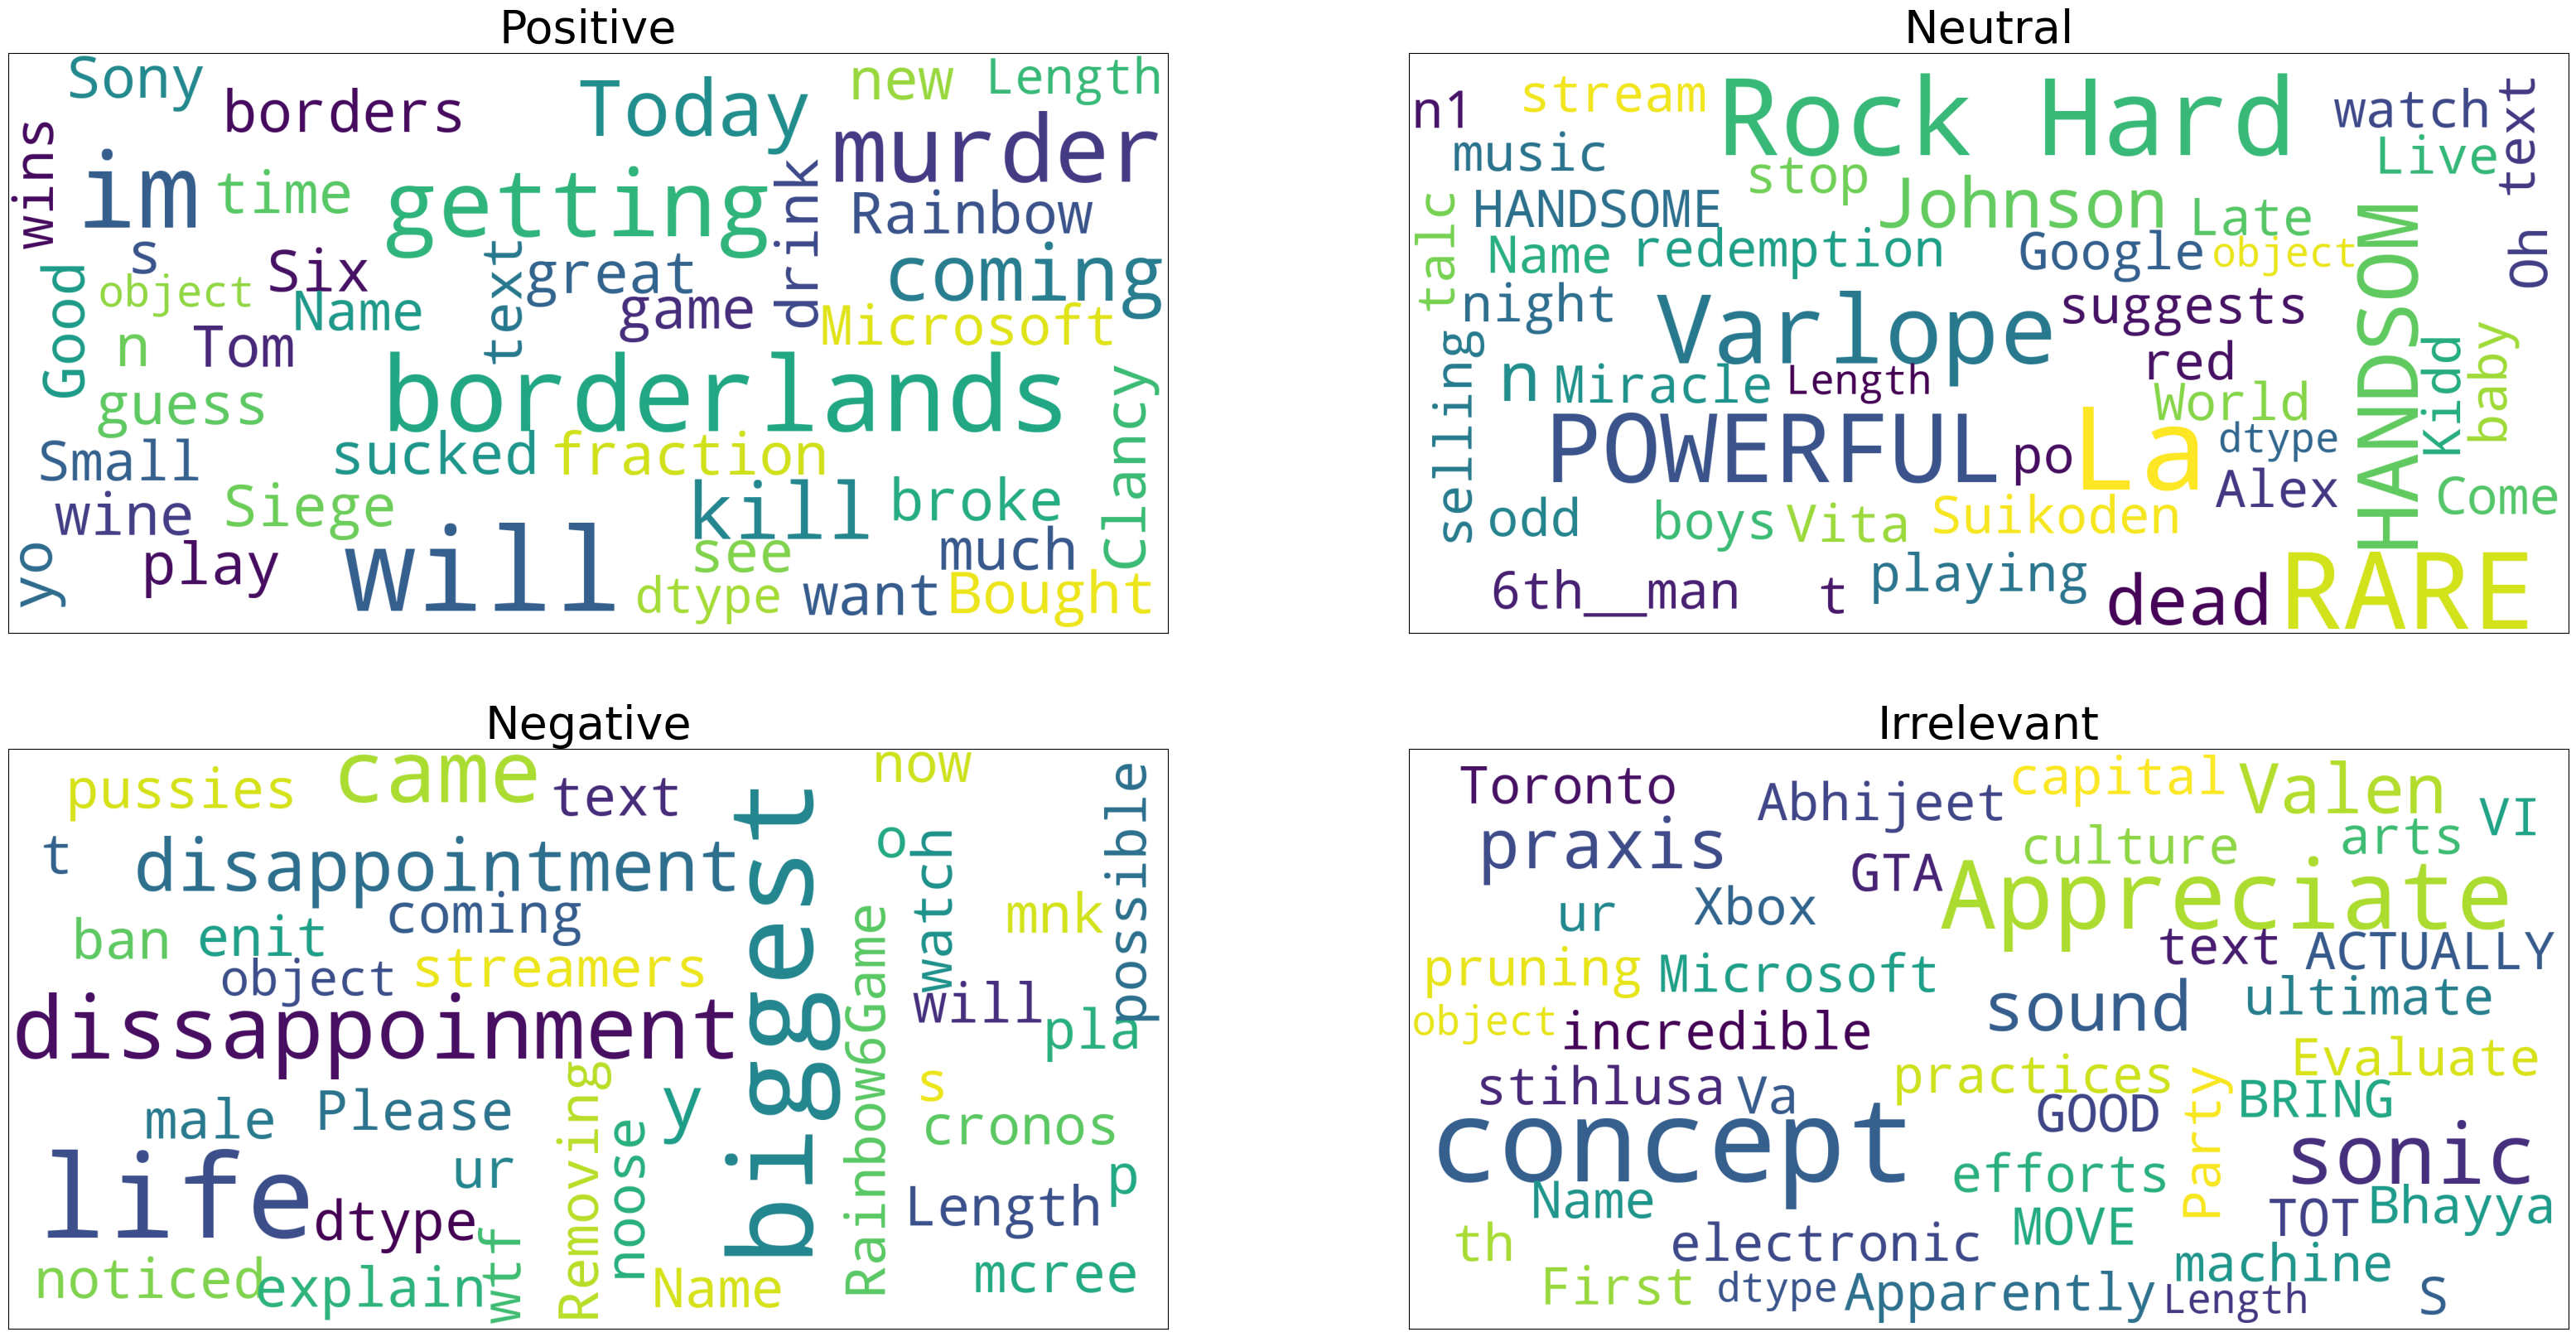

<Figure size 640x480 with 0 Axes>

In [22]:
plt.figure(figsize=(40,20))

for index, col in enumerate(df['sentiment'].unique()):
    plt.subplot(2,2, index+1)
    # print(col)
    df1 = df[df['sentiment']==col]
    data = df1['text']
    wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=500, max_font_size=40, scale=5).generate(str(data))
    # fig = plt.figure(figsize=(15,15))
    # plt.axis('off')
    # disable ticks
    plt.xticks([])
    plt.yticks([])
    plt.imshow(wordcloud)
    plt.title(col, fontsize=40)
    
plt.show()
plt.tight_layout()

In [23]:
#Data Cleaning

In [24]:
df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply(lambda x: ps.remove_urls(x))
df['text'] = df['text'].apply(lambda x: ps.remove_html_tags(x))
df['text'] = df['text'].apply(lambda x: ps.remove_special_chars(x))
df['text'] = df['text'].apply(lambda x: ps.remove_rt(x))

In [25]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)


In [26]:
X_train.shape, X_test.shape

((59996,), (15000,))

#Model Building and Testing

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [30]:
stopwords = list({'itself', 'no', 'his', 'why', "here's", ...})
clf = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stopwords)),
    ('rfc', RandomForestClassifier(n_jobs=-1))
])

clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['his', 'no', "here's", 'why',
                                             Ellipsis, 'itself'])),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

In [35]:
from sklearn.metrics import accuracy_score

predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.9108666666666667


In [36]:
import pickle

pickle.dump(clf, open('twitter_sentiment.pkl', 'wb'))

In [37]:
clf.predict(['let me not uset you'])

array(['Negative'], dtype=object)

In [38]:
clf.predict(['I am really glad to see you'])

array(['Positive'], dtype=object)

In [39]:
clf.predict(['concept'])

array(['Positive'], dtype=object)

In [40]:
clf.predict(['how the hell are we into halloween month already'])

array(['Irrelevant'], dtype=object)

In [41]:
clf.predict(['i have done nothing but play borderlad'])

array(['Positive'], dtype=object)